In [ ]:
# math library
import numpy as np

# plotting library
import matplotlib.pyplot as plt

# scientific library
# loadmat function loads a .dat file
from scipy.io import loadmat

In [12]:
# pulling .dat file into notebook
prob1Data = loadmat('HW1Prob1_ExptlData.mat')

# creating arrays from .dat container
x = prob1Data['x'][0]
y = prob1Data['y'][0]

# evaluating y array with log function
ylog = np.log(y)

In [13]:
# polyfitting data for first plot
p1 = np.polyfit(x,ylog,1)
# placing values into list
p1_vals = [p1[0],np.exp(p1[1])]
# using list comprehension to create a new list of old list
y1 = [p1_vals[1]*np.exp(p1_vals[0]*k) for k in x]

# polyfitting data for second plot
p2 = np.polyfit(x,ylog,1)
# fitting the data with polyfit values
y2 = np.polyval(p2,x)

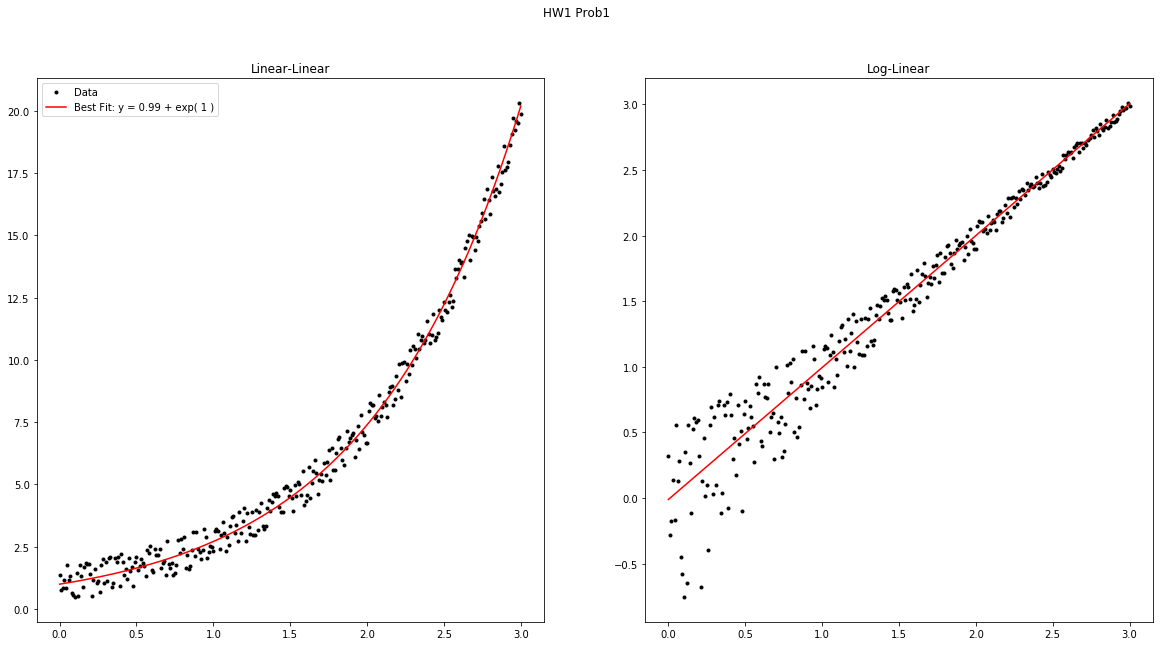

In [23]:
# creating figure with subplots and larger size (number size is in inches)
fig,((ax1),(ax2)) = plt.subplots(1,2,figsize=(20,10))

# plotting to subplot 1
ax1.plot(x,y,'.k',label="Data")
current_label = "Best Fit: y = %1.2f + exp( %1.0f )" % (p1_vals[1],p1_vals[0])
ax1.plot(x,y1,'r', label=current_label)

# plotting to subplot 2
ax2.plot(x,np.log(y),'.k')
ax2.plot(x,y2,'r')

# adding title and legend to plot
ax1.legend()
ax1.set_title('Linear-Linear')
ax2.set_title('Log-Linear')
fig.suptitle('HW1 Prob1')
plt.show()

# cleans up memory if done with figure
plt.close()

In [5]:
# pulling next .dat file for Problem 2
prob2Data = loadmat('MCdata.mat')

# creating arrays from .dat container
ch = prob2Data['Ch'][0]
nu = prob2Data['Nu'][0]
ra = prob2Data['Ra'][0]

(57,)

In [6]:
# descriptions to be used for plot
colors = ['k','m','b','g','r','c']
marker = ['*','o']

# breaking up data with these range values
ch_range = [0,2e4,6e4,1.5e5,4e5,2e6]

# creating necessary lists to be used
ch_mean = []
ch_current = []
ra_current = []
nu_current = []
vals = []

/home/daj/Documents/class/epss_171_computingGeoscience/venv171/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [7]:
# defining a function
# returns 2 values
def plawfit(x,y):
    ln_x = np.log(x)
    ln_y = np.log(y)
    p = np.polyfit(ln_x,ln_y,1)
    return p[0],np.exp(p[1])

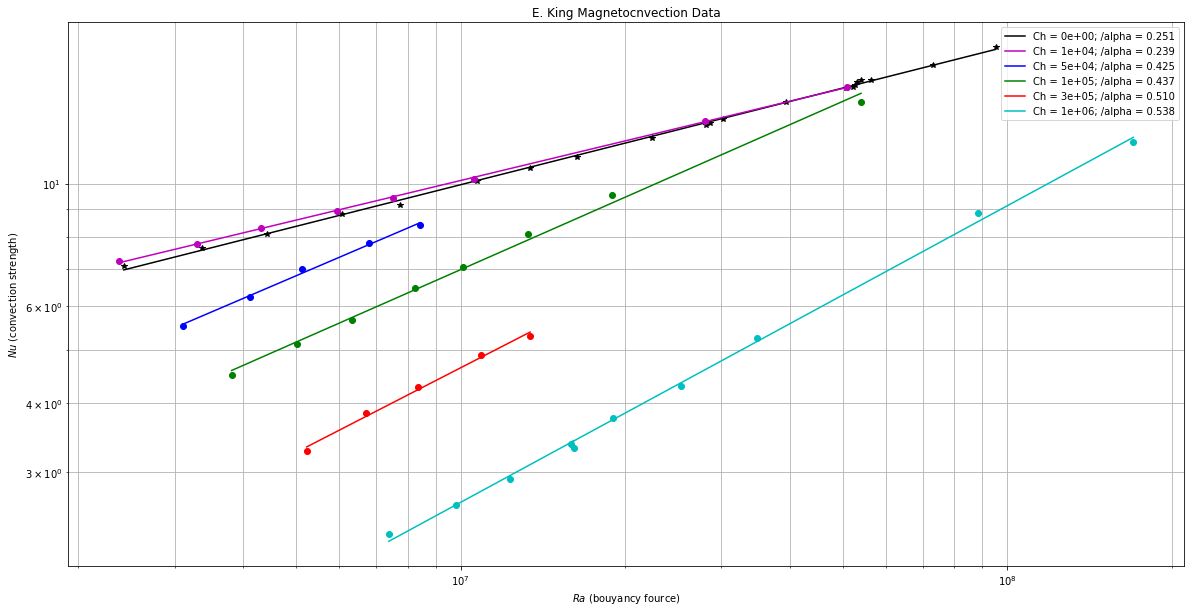

In [24]:
# creating figure of larger size
fig2 = plt.figure(figsize=(20,10))

# for loop iterating from [0,6)
for i in range(len(ch_range)):
    # first case since this line is plotted different
    if(i == 0):
        # creatining logical vector
        ch_index = ch_range[i]==ch
        # applying vector to ra and nu datasets
        ra_current = ra[ch_index]
        nu_current = nu[ch_index]
        # applying vector and taking mean of ch dataset
        ch_mean.append(np.mean(ch[ch_index]))
        
        # using predefined function
        vals.append(plawfit(ra_current,nu_current))
        
        ra_val = [vals[i][1]*k**vals[i][0] for k in ra_current]
        
        current_label = "Ch = %1.0e; /alpha = %4.3f" % (ch_mean[i],vals[i][0])
        plt.loglog(ra_current, nu_current, colors[i]+marker[0])
        plt.loglog(ra_current, ra_val, colors[i], label=current_label)
    else:
        ch_index = ((ch > ch_range[i-1]) & (ch <= ch_range[i])) 
        ra_current = ra[ch_index]
        nu_current = nu[ch_index]
        ch_mean.append(np.mean(ch[ch_index]))
        
        vals.append(plawfit(ra_current,nu_current))
        
        ra_val = [vals[i][1]*k**vals[i][0] for k in ra_current]
        
        current_label = "Ch = %1.0e; /alpha = %4.3f" % (ch_mean[i],vals[i][0])
        plt.loglog(ra_current, nu_current, colors[i]+marker[1])
        plt.loglog(ra_current, ra_val, colors[i], label=current_label)

plt.xlabel("$Ra$ (bouyancy fource)")
plt.ylabel("$Nu$ (convection strength)")
plt.title("E. King Magnetocnvection Data")
plt.grid(b=True, which='both')
plt.legend()